In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
from darkflow.net.build import TFNet

In [2]:
def boxing(original_img, predictions):
    # return a new image with a bounding box over the original image using coordinates in predictions
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))

        if confidence > 0.3:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)

    return newImage

In [11]:
options = {"model": "cfg/yolo.cfg", 
           "load": "bin/yolo.weights", 
           "threshold": 0.3, 
           "gpu": 0.0,
           "labels": "labels.txt",}

tfnet = TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 1.565007209777832s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  

[{'label': 'car', 'confidence': 0.35712215, 'topleft': {'x': 829, 'y': 747}, 'bottomright': {'x': 906, 'y': 818}}, {'label': 'car', 'confidence': 0.4334, 'topleft': {'x': 1038, 'y': 724}, 'bottomright': {'x': 1154, 'y': 828}}, {'label': 'traffic light', 'confidence': 0.52651435, 'topleft': {'x': 1066, 'y': 282}, 'bottomright': {'x': 1175, 'y': 394}}, {'label': 'clock', 'confidence': 0.45270202, 'topleft': {'x': 2039, 'y': 193}, 'bottomright': {'x': 2218, 'y': 418}}]


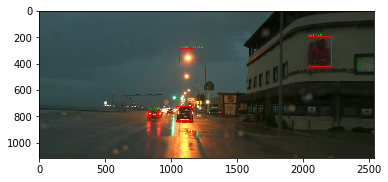

In [16]:
DATA_DIR = 'data/'
RESULTS_DIR = 'results/'

filename = '4.png'
img = cv2.imread(DATA_DIR + filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

results = tfnet.return_predict(img)

boxed_image = boxing(img, results)

plt.imshow(boxed_image)
plt.imsave(RESULTS_DIR+'boxed_image_'+filename, boxed_image)